In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from math import exp
import time

In [2]:
# the logistic function
def logistic_func(theta, x):
    t = x.dot(theta)
    g = np.zeros(t.shape)
    # split into positive and negative to improve stability
    g[t>=0.0] = 1.0 / (1.0 + np.exp(-t[t>=0.0]))
    g[t<0.0] = np.exp(t[t<0.0]) / (np.exp(t[t<0.0])+1.0)
    return g

# function to compute log-likelihood
def neg_log_like(theta, x, y):
    g = logistic_func(theta,x)
    return -sum(np.log(g[y>0.5])) - sum(np.log(1-g[y<0.5]))

# function to compute the gradient of the negative log-likelihood
def log_grad(theta, x, y):
    g = logistic_func(theta,x)
    return -x.T.dot(y-g)

In [3]:
# implementation of gradient descent for logistic regression
# INPUTS:
#   tol: tolerance for GD. If ||theta_k - theta_{k-1}||_2 <= tol, STOP.
#           theta_k is the estimate for \theta at iter k
#   blocksize: the number of samples used in approximating the gradient
#   maxiter: maximum number of iterations.
#######################################################
#######################################################
##              TODO: PROBLEM 1                      ##
#######################################################
#######################################################
def stoc_grad_desc(theta, x, y, alpha, blocksize, tol, maxiter):
    #YOUR IMPLEMENTATION HERE
    
    
    vec = []
    #arr=np.array([])
    vec.append(neg_log_like(theta, x, y))
    delta = 2.0*tol
    iter = 0
    
    np.random.seed(9001)
    i = np.random.permutation(len(x))
#     print(i)
    
    index=0
    
    while (delta > tol ) and (iter < maxiter):
        
        calculate_grad = log_grad(theta, x[i[index:index+blocksize]], y[i[index:index+blocksize]])
        theta = theta - (alpha * calculate_grad) 
#         print(f'--- batch size {blocksize} -- Gradient updated {i[index:index+blocksize]}')
        #theta = theta - (alpha * log_grad(theta, x[i[blocksize]], y[i[blocksize]]))    
        
        vec.append(neg_log_like(theta, x, y))
        delta = np.abs(vec[-2]-vec[-1])
#         print(x[i[index]:i[index+blocksize]])
        iter += 1
        
        
        index=index+blocksize
        if(index+blocksize>= len(x)-1 ):
            index=0
    #arr = np.array(vec) 
    #arr=arr*(-1)
    return theta, np.array(vec), delta
#     return theta, arr
    
    
    
    
    return None, None #RETURN: 2 values: estimated theta, cost at each iteration as np.array

# function to compute output of LR classifier (unused)
def lr_predict(theta,x):
    # form Xtilde for prediction
    shape = x.shape
    Xtilde = np.zeros((shape[0],shape[1]+1))
    Xtilde[:,0] = np.ones(shape[0])
    Xtilde[:,1:] = x
    return logistic_func(theta,Xtilde)

Block size = 1------------------
Running time of SGD: 0.26969313621520996
Final value of negative log-likelihood of SGD: 424.1538524259365
Converged at delta of: 2.296441834914731e-05
Number of iterations for SGD: 2826
Block size = 5------------------
Running time of SGD: 0.18848085403442383
Final value of negative log-likelihood of SGD: 406.3781820792126
Converged at delta of: 2.4406625925621483e-05
Number of iterations for SGD: 1927
Block size = 10------------------
Running time of SGD: 0.21774554252624512
Final value of negative log-likelihood of SGD: 404.93353787794206
Converged at delta of: 1.7329949230315833e-05
Number of iterations for SGD: 2184


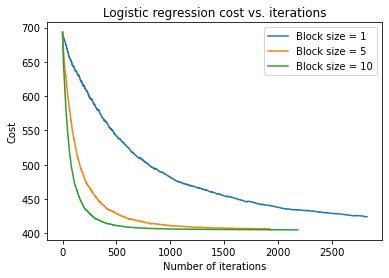

In [4]:
## Generate dataset
np.random.seed(2022) # Set random seed so results are repeatable
x,y = datasets.make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=5.0)

## build classifier
# form Xtilde
shape = x.shape
xtilde = np.zeros((shape[0],shape[1]+1))
xtilde[:,0] = np.ones(shape[0])
xtilde[:,1:] = x

theta_sgd = np.zeros(shape[1]+1)

# Run gradient descent
alpha = 1e-4
maxiter = 100000
tol = 3e-5

blocksizes = [1,5,10]
legend_block = []

for blocksize in blocksizes:
    start = time.time()
    theta_sgd, cost_sgd,delta = stoc_grad_desc(theta_sgd, xtilde, y, alpha, blocksize, tol, maxiter)
    end = time.time()

    legend_block.append("Block size = " + str(blocksize))
    print('Block size = ' + str(blocksize) + '------------------')
    print('Running time of SGD: ' + str(end-start))
    print('Final value of negative log-likelihood of SGD: ' + str(cost_sgd[-1]))
    print('Converged at delta of: ' + str(delta))
    print('Number of iterations for SGD: ' + str(len(cost_sgd)-1))

    plt.plot(np.arange(len(cost_sgd)), cost_sgd)
    theta_sgd = np.zeros(shape[1]+1)

plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Logistic regression cost vs. iterations")
plt.legend(legend_block)
plt.savefig("cost_vs_iter_sgd.png")
plt.show()
